In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv
/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx
/kaggle/input/playground-series-s3e8/sample_submission.csv
/kaggle/input/playground-series-s3e8/train.csv
/kaggle/input/playground-series-s3e8/test.csv


In [2]:
test = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv',index_col=0)
train = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv',index_col=0)
origin = pd.read_csv('/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv')

In [3]:
pd.read_excel('/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx')

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [4]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
train.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [6]:
train.describe(include = object)

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [7]:
val = train.groupby(['carat','clarity']).agg({'price':'max'})
val

price
carat clarity       
0.20  SI1        367
      VS1        399
      VS2        397
0.21  SI1        367
      SI2        386
...              ...
3.01  SI2      18640
3.04  SI2      17068
      VS2      15897
3.40  SI2      18242
3.50  SI2      18507

[1408 rows x 1 columns]

In [8]:
sns.set(rc={'figure.figsize':(10,10)})

<AxesSubplot:xlabel='carat', ylabel='price'>

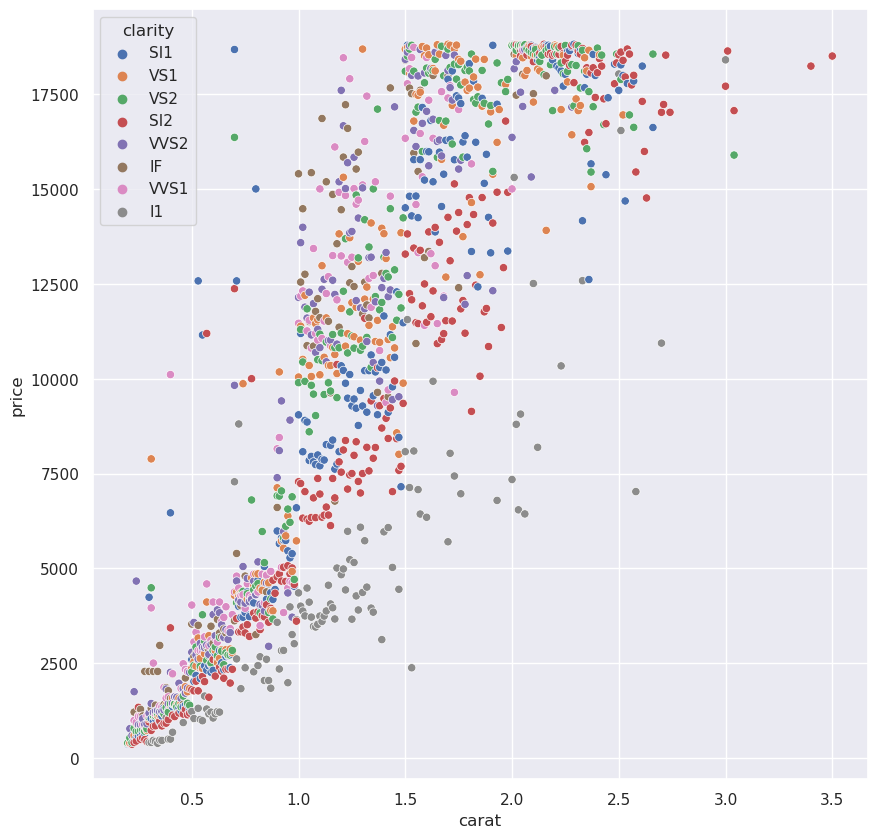

In [9]:
sns.scatterplot(data=val,x='carat',y='price',hue='clarity')

In [10]:
train.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

<AxesSubplot:>

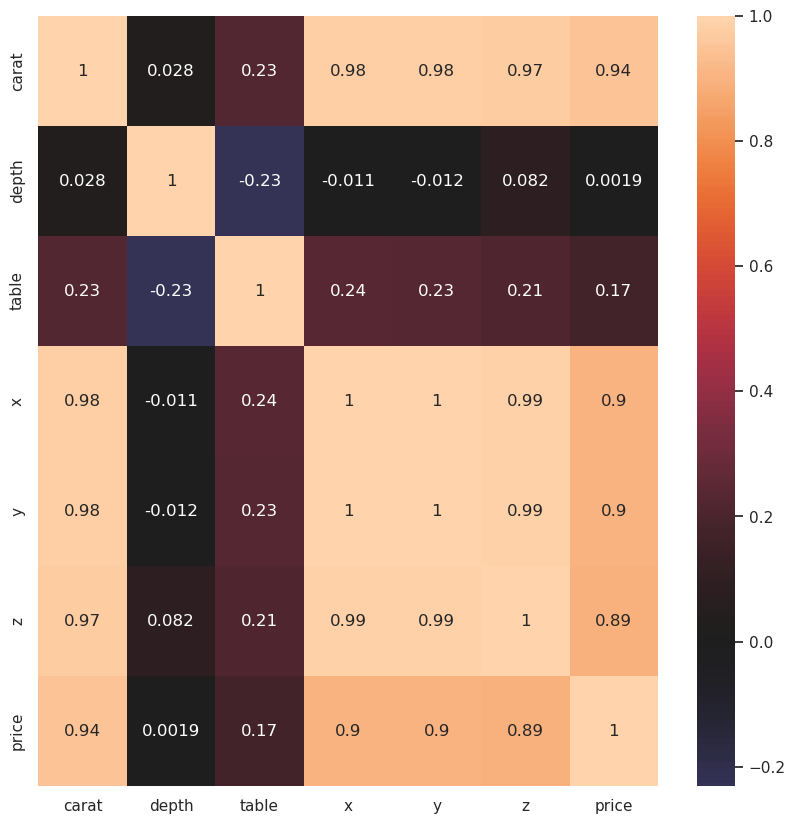

In [11]:
sns.heatmap(train.corr(),center=0,annot=True)

<AxesSubplot:xlabel='cut', ylabel='count'>

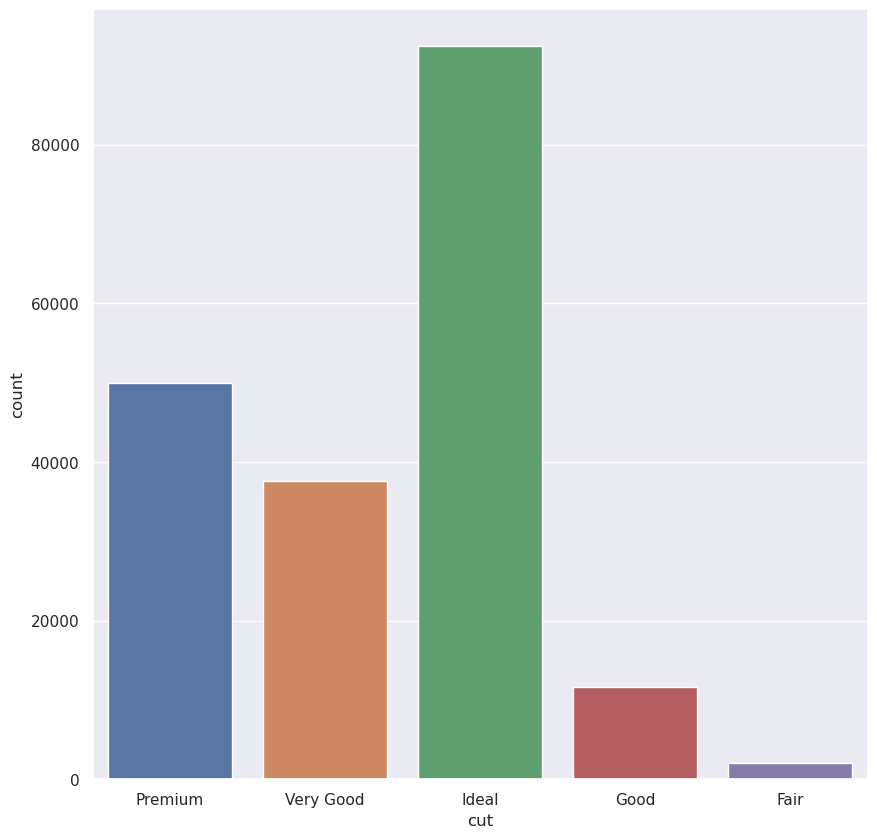

In [12]:
sns.countplot(data=train,x='cut')

<AxesSubplot:xlabel='color', ylabel='count'>

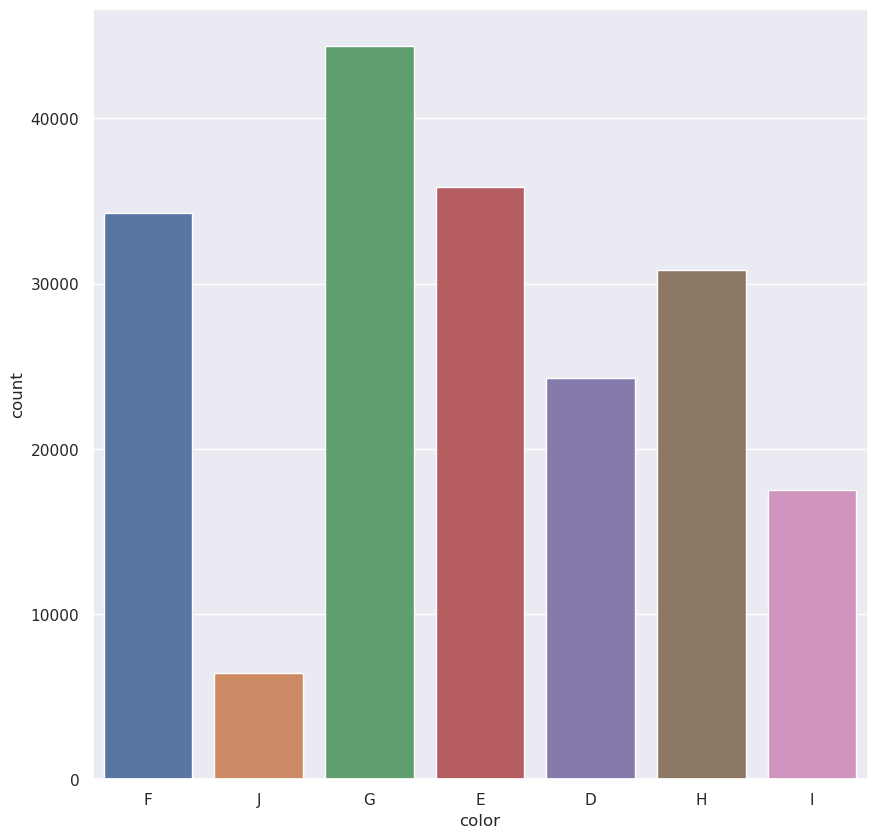

In [13]:
sns.countplot(data=train,x='color')

<AxesSubplot:xlabel='clarity', ylabel='count'>

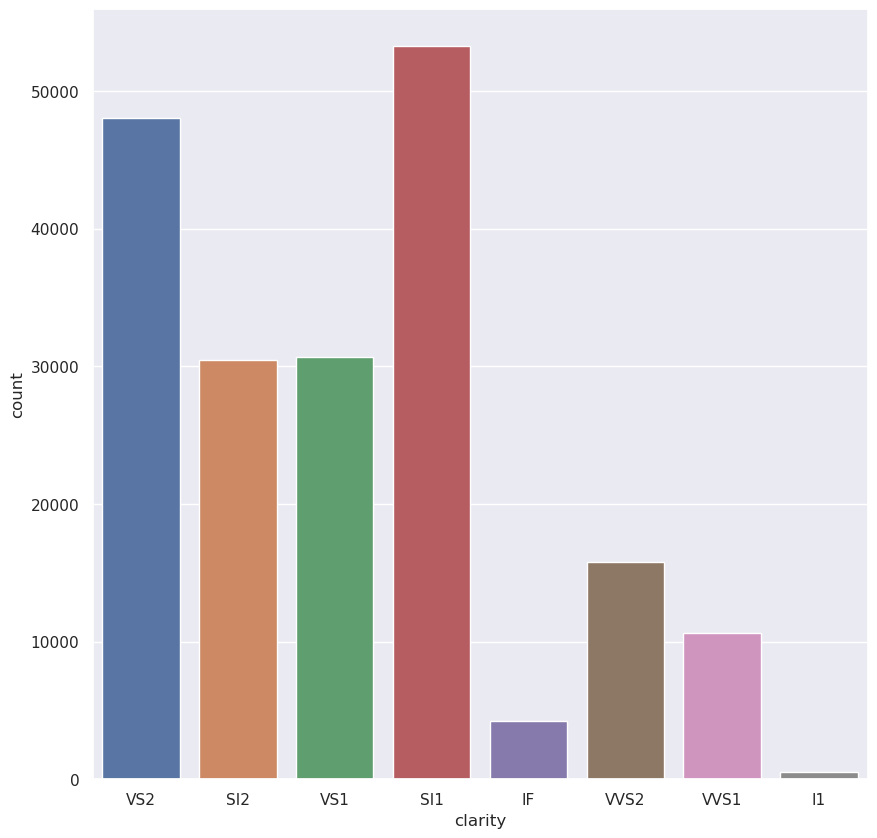

In [14]:
sns.countplot(data=train,x='clarity')

In [15]:
def FE(table):
    df = table.copy()
    str_col = table.select_dtypes(include=('object'))
    
    df[pd.get_dummies(str_col).columns] = pd.get_dummies(str_col)
    
    le = preprocessing.LabelEncoder()
    for col in str_col:
        df[col] = le.fit_transform(df[col].astype('str'))
    
    return df

In [16]:
df_train = pd.concat([train,origin],ignore_index=True)
df_train = FE(train.copy())

In [17]:
X = df_train.drop(['price'], axis=1)
y = df_train[['price']]

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.08, max_depth=5,subsample=1,random_state=20)
model.fit(X_train, y_train)
preds = model.predict(X_test)
model.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9793212971173033

In [21]:
prepare_test_df = FE(test.copy())
prepare_test_df = sc.fit_transform(prepare_test_df)

In [22]:
sample = pd.read_csv('/kaggle/input/playground-series-s3e8/sample_submission.csv')
sample.price = model.predict(prepare_test_df)

In [23]:
sample.to_csv('submission.csv',index=False)